<a href="https://colab.research.google.com/github/dwtkse33/ml_GoogleColab/blob/master/%EB%8F%99%ED%83%84%2C_%EB%B3%91%EC%A0%90%EB%8F%99_%EC%95%84%EC%9D%B4%EB%94%94%EC%96%B41_%EC%9D%B4%EC%83%81%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 동탄/병점동 중심의 버스노선 분석

### 분석에 필요한 library import 및 파일 준비

In [ ]:
# import os

# # for data aggregation.
# import numpy as np
# import pandas as pd
# import geopandas as gpd
# from geopy.distance import distance, lonlat

# from tqdm import tqdm_notebook

# # for data visualisation.
# import matplotlib.pyplot as plt
# import plotly_express as px
# import chart_studio.plotly as py
# import cufflinks as cf 
# cf.go_offline(connected=True)
# cf.set_config_file(theme='polar')
# import deckgljupyter.Layer as deckgl
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# from matplotlib import rc
# import matplotlib
# import matplotlib.font_manager
# plt.rcParams["font.family"] = 'NanumBarunGothic'
# #[(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

# # rc('font', family='AppleGothic')
# # plt.rcParams['axes.unicode_minus'] = False

# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

# import warnings
# warnings.filterwarnings('ignore')


In [ ]:
%cd hs_data/

[WinError 2] 지정된 파일을 찾을 수 없습니다: 'hs_data/'
C:\Users\ASIA_07\00.sjpark\화성시 시내버스 프로젝트\아이디어1


In [ ]:
df_stations = pd.read_csv('C:/Users/ASIA_07/Desktop/Compas 과제/stations_table.csv')
df_station_mapping = pd.read_csv('C:/Users/ASIA_07/Desktop/Compas 과제/routestationmapping.csv')
df_route_station = pd.read_csv('C:/Users/ASIA_07/Desktop/Compas 과제/routestationinfo.csv')

----

## 1) 동탄/병점 지역 버스노선 <font color='red'>중복도</font>에 대한 조사

**통탄/병점동 버스노선에 대해 조사를 위해 해당 지역에 위치한 정류장만을 선택합니다.**

In [ ]:
#1. station_table에서 화성시만 검색
df_station_hs = df_stations.loc[df_stations['시군명'].str.contains('화성시', na=False)]


#2. 정류소의 위치에 '병점|동탄|반월|진안|화산|기배' 포함된 정류소만 검색

# 화성시 중에서도 병점 동탄 반월 등임 .. 주의!!
df_station_hs = df_station_hs.loc[df_station_hs['위치'].str.contains('병점|동탄|반월|진안|화산|기배', na=False)]


#3. 경유지 정류장ID인 27로 시작하는 ID값을 제외한 표준정류장ID를 검색
df_station_hs['표준정류장ID'] = df_station_hs['표준정류장ID'].astype(np.str)
df_station_hs = df_station_hs[~df_station_hs['표준정류장ID'].str.match('27')]      # match는 정규표현식이라고함. 27로 시작하는 숫자인듯.
                                                                             # ????? 화성시검색하면 23으로시작하는거도 있는데 왜 뺐는지??
df_station_hs.shape

(202, 12)

**버스 정류장에 대한 정보 테이블과 버스노선-정류장 매핑 테이블을 merge 합니다.**

In [ ]:
# merge을 위해 dtype을 int로 다시 변환
df_station_hs['표준정류장ID'] = df_station_hs['표준정류장ID'].astype(np.int)

# 정류장ID별로 merge
# 모양은 정확히 모르겠지만 (left, right, inner) 어쨌든 합쳤음. 
df_station_merge = pd.merge(df_route_station, 
             df_station_hs[['표준정류장ID', '정류소명', 'WGS84위도', 'WGS84경도', '관할관청', '위치']],
             left_on='station_id', right_on='표준정류장ID', how='inner')

# route id나 station id가 없는 data drop
df_station_merge.dropna(subset=['pr_station_id', 'station_id'], inplace=True)
df_station_merge.shape

(1079, 13)

In [ ]:
df_station_merge  #화성시꺼만 뽑은 merge data. 버스랑노선정보 + 정류장 정보를 각각 routestation파일과 tation파일에서 따옴.


,seq,pr_station_id,bus_line_no,bus_line_no_seq,station_nm,station_id,mobile_no,표준정류장ID,정류소명,WGS84위도,WGS84경도,관할관청,위치
0,68834,228000204,24,53,한원IC,233000169,37403.0,233000169,한원IC,37.152733,127.122883,경기도 화성시,경기도 화성시 동탄면
1,68835,228000204,24,54,장지동,233000168,36808.0,233000168,장지리,37.155117,127.117900,경기도 화성시,경기도 화성시 동탄면
2,163920,241317006,19-2,1,장지동,233000168,36808.0,233000168,장지리,37.155117,127.117900,경기도 화성시,경기도 화성시 동탄면
3,164077,241317009,39,1,장지동,233000168,36808.0,233000168,장지리,37.155117,127.117900,경기도 화성시,경기도 화성시 동탄면
4,68836,228000204,24,55,장지동,233000167,36809.0,233000167,장지리,37.155867,127.115017,경기도 화성시,경기도 화성시 동탄면
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,191581,241491008,38,33,우남퍼스트빌3차아파트,233000099,36359.0,233000099,우남퍼스트빌3차아파트,37.198017,127.041283,경기도 화성시,경기도 화성시 병점동
1075,191633,241491009,35,21,우남퍼스트빌3차아파트,233000099,36359.0,233000099,우남퍼스트빌3차아파트,37.198017,127.041283,경기도 화성시,경기도 화성시 병점동
1076,191722,241491011,38-1,35,우남퍼스트빌3차아파트,233000099,36359.0,233000099,우남퍼스트빌3차아파트,37.198017,127.041283,경기도 화성시,경기도 화성시 병점동
1077,191452,241491003,66A,20,우남퍼스트빌3차아파트,233000949,36358.0,233000949,우남퍼스트빌3차아파트,37.198433,127.041433,경기도 화성시,경기도 화성시 병점동


In [ ]:
# ID값의 dtype을 float -> int 로 변경
df_station_merge = df_station_merge.astype({"pr_station_id": int, "bus_line_no_seq": int, "station_id": int})

In [ ]:
df_station_smy = df_station_merge[['pr_station_id', 'bus_line_no', 'bus_line_no_seq', 'station_id', 'station_nm', 'WGS84위도', 'WGS84경도' ,'관할관청' , '위치']]
df_station_smy

,pr_station_id,bus_line_no,bus_line_no_seq,station_id,station_nm,WGS84위도,WGS84경도,관할관청,위치
0,228000204,24,53,233000169,한원IC,37.152733,127.122883,경기도 화성시,경기도 화성시 동탄면
1,228000204,24,54,233000168,장지동,37.155117,127.117900,경기도 화성시,경기도 화성시 동탄면
2,241317006,19-2,1,233000168,장지동,37.155117,127.117900,경기도 화성시,경기도 화성시 동탄면
3,241317009,39,1,233000168,장지동,37.155117,127.117900,경기도 화성시,경기도 화성시 동탄면
4,228000204,24,55,233000167,장지동,37.155867,127.115017,경기도 화성시,경기도 화성시 동탄면
...,...,...,...,...,...,...,...,...,...
1074,241491008,38,33,233000099,우남퍼스트빌3차아파트,37.198017,127.041283,경기도 화성시,경기도 화성시 병점동
1075,241491009,35,21,233000099,우남퍼스트빌3차아파트,37.198017,127.041283,경기도 화성시,경기도 화성시 병점동
1076,241491011,38-1,35,233000099,우남퍼스트빌3차아파트,37.198017,127.041283,경기도 화성시,경기도 화성시 병점동
1077,241491003,66A,20,233000949,우남퍼스트빌3차아파트,37.198433,127.041433,경기도 화성시,경기도 화성시 병점동


In [ ]:
# 편의상 column의 순서를 다시 조합 및 rename
df_station_smy = df_station_merge[['pr_station_id', 'bus_line_no', 'bus_line_no_seq', 'station_id', 'station_nm', 'WGS84위도', 'WGS84경도' ,'관할관청' , '위치']]
df_station_smy.shape

new_col_names = ['ROUTE_ID', 'ROUTE_NM', 'SEQ', 'STATION_ID', 'STATION_NM', 'MAP_LAT', 'MAP_LON' ,'관할관청', '위치']
df_station_smy.columns = new_col_names

# 노선ID, 정류장순서 순으로 정렬
df_station_smy.sort_values(by=["ROUTE_ID", "SEQ"])   # 보면 SEQ넘버가 막 건너띄어있는데, 앞에서 merge할 때 inner 값이면 공통된 값이 없으면 빠진다고 함. 그래서 SEQ넘버가 듬성듬성있는듯.

,ROUTE_ID,ROUTE_NM,SEQ,STATION_ID,STATION_NM,MAP_LAT,MAP_LON,관할관청,위치
0,228000204,24,53,233000169,한원IC,37.152733,127.122883,경기도 화성시,경기도 화성시 동탄면
1,228000204,24,54,233000168,장지동,37.155117,127.117900,경기도 화성시,경기도 화성시 동탄면
4,228000204,24,55,233000167,장지동,37.155867,127.115017,경기도 화성시,경기도 화성시 동탄면
7,228000204,24,58,233000166,꽃가마약수터,37.159100,127.099350,경기도 화성시,경기도 화성시 동탄면
8,228000204,24,80,233001323,꽃가마약수터,37.158900,127.098750,경기도 화성시,경기도 화성시 동탄면
...,...,...,...,...,...,...,...,...,...
1047,241491011,38-1,42,233002394,안화고등학교,37.211433,127.047517,경기도 화성시,경기도 화성시 병점동
754,241491011,38-1,43,233000071,안화초교.주공8.9단지,37.213300,127.046083,경기도 화성시,경기도 화성시 병점동
849,241491011,38-1,44,233000066,중심상가,37.215150,127.043750,경기도 화성시,경기도 화성시 진안동
763,241491011,38-1,45,233002132,롯데시네마,37.214483,127.042450,경기도 화성시,경기도 화성시 진안동


In [ ]:
grp

**COMPAS 가이드를 참고하여 동탄/병점주변 버스 노선 중복도 dataframe 생성**

In [ ]:
# ods[route_id] 에 route_id 노선의 전 구간을 set 에 담습니다.
ods = {}
grp = df_station_smy.groupby('ROUTE_ID')
 # grp 는 grp.mean() 해보면 무슨 말인지 알 수 있음. ROUT_ID를 기준으로 내용들을 묶었음.
    
for route_id, gdf in grp:       # route_id, gdf가 뭔지를 알려면 for a,b in grp : print(a) ; print(b) ㅇ이거 해보기
                                   # rout_id 나오고, gdf는 그 내용레코드 전체임 ㅇㅇ
    gdf = gdf.sort_values('SEQ')
    od_set = set()
    for i in range(1, len(gdf)):
        od = (gdf['STATION_ID'].iloc[i-1], gdf['STATION_ID'].iloc[i])
        od_set.add(od)
    ods[route_id] = od_set            #ods는 결국 df_station_smy즉 화성시 버스정보가지고(grp) --> 거기서 걍 다 내용 뽑은담에 
                                      #-> station_ID 칼럼에서 값들 쌍을 뽑음. 그게 ods임.

    
# diff_routes[route_id1][route_id2] 에 노선 route_id1와 route_id2 간의 중복도 값을 구합니다.

# 이거 이해가 안 된다!
diff_routes = {}
for route_id1, od_set1 in ods.items():
    d = {}
    for route_id2, od_set2 in ods.items():
        diff = od_set1 & od_set2
        try:
            d[route_id2] = len(diff) / len(od_set1)
        except:
            print(ods.items())
    diff_routes[route_id1] = d

In [ ]:
ods

{228000204: {(233000166, 233001323),
  (233000167, 233000166),
  (233000168, 233000167),
  (233000169, 233000168),
  (233001320, 233001321),
  (233001323, 233001320)},
 233000077: {(233000097, 233001290),
  (233000098, 233001920),
  (233000695, 233001921),
  (233000696, 233000695),
  (233000701, 233000950),
  (233000978, 233001637),
  (233001290, 233002383),
  (233001637, 233001649),
  (233001648, 233000978),
  (233001649, 233002382),
  (233001920, 233000701),
  (233001921, 233000097),
  (233002382, 233000098),
  (233002383, 233001648)},
 233000128: {(233000100, 233001290),
  (233000101, 233000702),
  (233000122, 233001166),
  (233000135, 233000981),
  (233000149, 233002429),
  (233000702, 233000100),
  (233000959, 233001506),
  (233000981, 233001505),
  (233001166, 233001493),
  (233001290, 233002442),
  (233001492, 233000135),
  (233001493, 233001492),
  (233001506, 233000149),
  (233002429, 233002430),
  (233002430, 233002431),
  (233002431, 233002432),
  (233002432, 233002443),
  (

In [ ]:
# 이거 이해가 안 된다! --> 된다

# 이렇게 해보니 이해가 감. 그러니까 od_set1 이랑 od_set2는 같은거긴 한데, od_set1 밑에서 od_set2가 돌기 때문에 od_set1의 첫 번째는
# od_sest2 첫 째에서 d[route_id2]가 1임. 그 담부턴 0~1 사이 숫자임. 겹치는 만큼만. od_set2 둘 째 for문에선 od_set2의 첫째꺼는 0~1사이이고
#그 다음 것이 1이고 그 다음에는 0~1사이임. diff_routes뽑아보면 1(1),0~1,0~1 ... ** / 0~1,1(2),0~1 ,,, / 0~1,0~1,1(3),0~1,... 뭐일케.이해o 

diff_routes = {}
for route_id1, od_set1 in ods.items():
    d = {}
    print("odset1 = ",od_set1)
    for route_id2, od_set2 in ods.items():
        print("odset2",od_set2)
        diff = od_set1 & od_set2             #그러니깐 odd_set1이랑 odd_set2 교집함인게 중복되는건데, 그걸 밑에서 od_set1로 나누니까 od_set2가 od_set1과 얼마나 겹치는지.알게됨.
        print("diff =", diff)
        print("od_set2 = ", od_set2)
        try:
            d[route_id2] = len(diff) / len(od_set1)     # 0인거는 중복이 없는거 
            print("drouteid2 = ", d[route_id2])
        except:
            print(ods.items())
    diff_routes[route_id1] = d      #diff_routes 는 결국 ods에서 그 쌍들가지고 중복되는지를 체크하여서 --> 노선별로 정류장 중복도를 노선끼리 뽑아낸 것임. (a노선이랑 b 노선이 얼마나 정류장들이 많이 겹치는지.)

odset1 =  {(233000168, 233000167), (233001323, 233001320), (233000167, 233000166), (233000166, 233001323), (233000169, 233000168), (233001320, 233001321)}
odset2 {(233000168, 233000167), (233001323, 233001320), (233000167, 233000166), (233000166, 233001323), (233000169, 233000168), (233001320, 233001321)}
diff = {(233000168, 233000167), (233001323, 233001320), (233000167, 233000166), (233001320, 233001321), (233000166, 233001323), (233000169, 233000168)}
od_set2 =  {(233000168, 233000167), (233001323, 233001320), (233000167, 233000166), (233000166, 233001323), (233000169, 233000168), (233001320, 233001321)}
drouteid2 =  1.0
odset2 {(233002383, 233001648), (233001921, 233000097), (233000098, 233001920), (233001290, 233002383), (233001649, 233002382), (233001637, 233001649), (233000978, 233001637), (233001648, 233000978), (233001920, 233000701), (233000097, 233001290), (233000695, 233001921), (233000696, 233000695), (233002382, 233000098), (233000701, 233000950)}
diff = set()
od_set2 =  

odset2 {(233000072, 233000082), (233000071, 233002132), (233002392, 233000071), (233000640, 233002403), (233002132, 233000671), (233000641, 233000640), (233002403, 233000072), (233000082, 233002392)}
diff = set()
od_set2 =  {(233000072, 233000082), (233000071, 233002132), (233002392, 233000071), (233000640, 233002403), (233002132, 233000671), (233000641, 233000640), (233002403, 233000072), (233000082, 233002392)}
drouteid2 =  0.0
odset2 {(233000129, 233000980), (233000140, 233001166), (233001491, 233001168), (233002421, 233002421), (233002421, 233000129), (233000980, 233002429), (233001168, 233001168), (233002430, 233002431), (233002429, 233002430), (233001493, 233001492), (233002431, 233000140), (233001492, 233001491), (233001166, 233001493)}
diff = set()
od_set2 =  {(233000129, 233000980), (233000140, 233001166), (233001491, 233001168), (233002421, 233002421), (233002421, 233000129), (233000980, 233002429), (233001168, 233001168), (233002430, 233002431), (233002429, 233002430), (2330

odset2 {(233002032, 233002442), (233000130, 233000130), (233000964, 233002443), (233000108, 233000066), (233000130, 233001637), (233000107, 233002032), (233003092, 233003093), (233003093, 233000162), (233000978, 233000964), (233002443, 233000108), (233000640, 233002403), (233002063, 233000708), (233000671, 233000703), (233000162, 233000978), (233001637, 233000996), (233002442, 233000130), (233000641, 233000640), (233000996, 233003092), (233000066, 233000671), (233000703, 233002064), (233000964, 233000964), (233000708, 233000641), (233002403, 233000107)}
diff = set()
od_set2 =  {(233002032, 233002442), (233000130, 233000130), (233000964, 233002443), (233000108, 233000066), (233000130, 233001637), (233000107, 233002032), (233003092, 233003093), (233003093, 233000162), (233000978, 233000964), (233002443, 233000108), (233000640, 233002403), (233002063, 233000708), (233000671, 233000703), (233000162, 233000978), (233001637, 233000996), (233002442, 233000130), (233000641, 233000640), (233000

od_set2 =  {(233002344, 233001621), (233001621, 233002383), (233002383, 233000130), (233001622, 233000101), (233001627, 233001622), (233002382, 233001627), (233000130, 233000130), (233000101, 233000702), (233000702, 233000100), (233000100, 233002344), (233000964, 233002382), (233000964, 233000964), (233000130, 233000964)}
drouteid2 =  0.0
odset2 {(233002392, 233002394), (233000071, 233000066), (233000072, 233002393), (233000671, 233000703), (233000702, 233000101), (233002394, 233000071), (233002132, 233000671), (233002403, 233000072), (233000101, 233000708), (233000066, 233002132), (233000708, 233000641), (233000641, 233000640), (233000640, 233002403), (233000082, 233002392), (233002393, 233000082)}
diff = {(233000671, 233000703), (233000702, 233000101), (233000708, 233000641), (233000101, 233000708), (233000066, 233002132), (233002132, 233000671), (233000641, 233000640), (233000640, 233002403)}
od_set2 =  {(233002392, 233002394), (233000071, 233000066), (233000072, 233002393), (233000

od_set2 =  {(233000129, 233000980), (233000140, 233001166), (233001491, 233001168), (233002421, 233002421), (233002421, 233000129), (233000980, 233002429), (233001168, 233001168), (233002430, 233002431), (233002429, 233002430), (233001493, 233001492), (233002431, 233000140), (233001492, 233001491), (233001166, 233001493)}
drouteid2 =  0.0
odset2 {(233000135, 233000981), (233002432, 233002443), (233000702, 233000100), (233000100, 233002344), (233002443, 233001622), (233002431, 233002432), (233000122, 233001166), (233000959, 233001506), (233002442, 233000122), (233001493, 233001492), (233002344, 233002442), (233001506, 233000149), (233002429, 233002430), (233001492, 233000135), (233001166, 233001493), (233001622, 233000101), (233000981, 233001505), (233000101, 233000702), (233002430, 233002431), (233000149, 233002429)}
diff = set()
od_set2 =  {(233000135, 233000981), (233002432, 233002443), (233000702, 233000100), (233000100, 233002344), (233002443, 233001622), (233002431, 233002432), (2

diff = {(233001662, 233001622), (233002032, 233002442), (233001637, 233003048), (233002006, 233000120), (233000087, 233000086), (233001685, 233001686), (233000130, 233000130), (233000964, 233002443), (233000702, 233000100), (233000100, 233002344), (233000130, 233001637), (233002442, 233000130), (233000086, 233002032), (233000080, 233001662), (233003048, 233000124), (233002344, 233001663), (233001663, 233000087), (233001622, 233000101), (233002443, 233001739), (233000120, 233003049), (233000101, 233000702), (233000964, 233000964), (233000978, 233000964), (233003049, 233000978), (233001686, 233000080), (233001739, 233001685)}
od_set2 =  {(233001662, 233001622), (233002032, 233002442), (233001637, 233003048), (233002006, 233000120), (233000087, 233000086), (233000130, 233000130), (233000964, 233002443), (233000702, 233000100), (233000100, 233002344), (233000130, 233001637), (233003048, 233000124), (233000978, 233000964), (233001686, 233000080), (233001739, 233001685), (233001685, 23300168

odset2 {(233002344, 233001621), (233001621, 233002383), (233002383, 233000130), (233001622, 233000101), (233001627, 233001622), (233002382, 233001627), (233000130, 233000130), (233000101, 233000702), (233000702, 233000100), (233000100, 233002344), (233000964, 233002382), (233000964, 233000964), (233000130, 233000964)}
diff = set()
od_set2 =  {(233002344, 233001621), (233001621, 233002383), (233002383, 233000130), (233001622, 233000101), (233001627, 233001622), (233002382, 233001627), (233000130, 233000130), (233000101, 233000702), (233000702, 233000100), (233000100, 233002344), (233000964, 233002382), (233000964, 233000964), (233000130, 233000964)}
drouteid2 =  0.0
odset2 {(233002392, 233002394), (233000071, 233000066), (233000072, 233002393), (233000671, 233000703), (233000702, 233000101), (233002394, 233000071), (233002132, 233000671), (233002403, 233000072), (233000101, 233000708), (233000066, 233002132), (233000708, 233000641), (233000641, 233000640), (233000640, 233002403), (23300

diff = {(233003093, 233000162), (233000130, 233000130), (233002442, 233000130), (233000964, 233002443), (233000162, 233000978), (233000130, 233001637), (233001637, 233000996), (233000964, 233000964), (233000978, 233000964), (233000996, 233003092)}
od_set2 =  {(233000130, 233000130), (233000964, 233002443), (233001300, 233000116), (233000130, 233001637), (233000115, 233001212), (233003093, 233000162), (233000978, 233000964), (233000116, 233000118), (233002443, 233002353), (233000162, 233000978), (233001637, 233000996), (233002442, 233000130), (233002353, 233001300), (233000996, 233003092), (233001212, 233002442), (233000117, 233001211), (233000118, 233000117), (233000964, 233000964), (233001211, 233000115)}
drouteid2 =  0.43478260869565216
odset2 {(233003093, 233000162), (233002442, 233000130), (233000130, 233000130), (233000964, 233002443), (233000162, 233000978), (233000130, 233001637), (233002443, 233002442), (233001637, 233000996), (233000964, 233000964), (233000978, 233000964), (23

od_set2 =  {(233000703, 233000701)}
drouteid2 =  0.0
odset2 {(233001662, 233001622), (233002032, 233002442), (233001637, 233003048), (233002006, 233000120), (233000087, 233000086), (233000130, 233000130), (233000964, 233002443), (233000702, 233000100), (233000100, 233002344), (233000130, 233001637), (233003048, 233000124), (233000978, 233000964), (233001686, 233000080), (233001739, 233001685), (233001685, 233001686), (233002442, 233000130), (233000086, 233002032), (233000080, 233001662), (233002344, 233001663), (233001663, 233000087), (233001622, 233000101), (233002443, 233001739), (233000120, 233003049), (233000101, 233000702), (233000964, 233000964), (233003049, 233000978)}
diff = {(233003048, 233000124), (233000101, 233000702), (233000120, 233003049), (233000702, 233000100)}
od_set2 =  {(233001662, 233001622), (233002032, 233002442), (233001637, 233003048), (233002006, 233000120), (233000087, 233000086), (233000130, 233000130), (233000964, 233002443), (233000702, 233000100), (233000

od_set2 =  {(233002032, 233002442), (233000130, 233000130), (233000964, 233002443), (233000108, 233000066), (233000130, 233001637), (233000107, 233002032), (233003092, 233003093), (233003093, 233000162), (233000978, 233000964), (233002443, 233000108), (233000640, 233002403), (233002063, 233000708), (233000671, 233000703), (233000162, 233000978), (233001637, 233000996), (233002442, 233000130), (233000641, 233000640), (233000996, 233003092), (233000066, 233000671), (233000703, 233002064), (233000964, 233000964), (233000708, 233000641), (233002403, 233000107)}
drouteid2 =  0.25
odset2 {(233000129, 233000980), (233002432, 233002443), (233000702, 233000100), (233001492, 233001491), (233002431, 233002432), (233000122, 233001166), (233001290, 233002442), (233002421, 233002421), (233000980, 233002429), (233001168, 233001168), (233002442, 233000122), (233001493, 233001492), (233000101, 233002064), (233002063, 233000702), (233001491, 233001168), (233002421, 233000129), (233000100, 233001290), (2

od_set2 =  {(233000168, 233000167), (233002364, 233000978), (233000167, 233002211), (233002361, 233002210), (233002363, 233002361), (233001637, 233002363), (233000978, 233001637), (233002211, 233002362), (233001320, 233000170), (233002210, 233001320), (233002362, 233002364)}
drouteid2 =  0.125
odset2 {(233001212, 233002442), (233000115, 233001212), (233000996, 233003092), (233003093, 233000162), (233000116, 233000117), (233002442, 233000130), (233002443, 233002353), (233000130, 233000130), (233000964, 233002443), (233000162, 233000978), (233001300, 233000116), (233000130, 233001637), (233001637, 233000996), (233000964, 233000964), (233001211, 233000115), (233000978, 233000964), (233002353, 233001300), (233000117, 233001211)}
diff = set()
od_set2 =  {(233001212, 233002442), (233000115, 233001212), (233000996, 233003092), (233003093, 233000162), (233000116, 233000117), (233002442, 233000130), (233002443, 233002353), (233000130, 233000130), (233000964, 233002443), (233000162, 233000978), 

diff = {(233002062, 233000101), (233000062, 233000676), (233000687, 233000062), (233000676, 233002064), (233000101, 233000708), (233002064, 233002062)}
od_set2 =  {(233000071, 233000066), (233000062, 233000676), (233001739, 233002394), (233001300, 233000113), (233000676, 233002064), (233001738, 233001739), (233002132, 233000671), (233002064, 233002062), (233000115, 233001212), (233000687, 233000062), (233002403, 233000072), (233000640, 233002403), (233000103, 233000102), (233002393, 233002032), (233001451, 233001738), (233002032, 233000103), (233000641, 233000640), (233002353, 233001300), (233000671, 233000687), (233000113, 233000112), (233000072, 233002393), (233002062, 233000101), (233002394, 233000071), (233000112, 233000104), (233001212, 233002353), (233000101, 233000708), (233000102, 233000115), (233000104, 233001451), (233000066, 233002132), (233000708, 233000641)}
drouteid2 =  0.2857142857142857
odset2 {(233000062, 233000676), (233000065, 233000107), (233000676, 233002064), (233

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
diff_routes

{228000204: {228000204: 1.0,
  233000077: 0.0,
  233000128: 0.0,
  233000130: 0.0,
  233000131: 0.0,
  233000133: 0.0,
  233000134: 0.0,
  233000135: 0.0,
  233000136: 0.0,
  233000141: 0.0,
  233000142: 0.0,
  233000144: 0.0,
  233000252: 0.0,
  233000253: 0.0,
  233000254: 0.0,
  233000266: 0.0,
  233000268: 0.0,
  233000275: 0.0,
  233000276: 0.0,
  233000277: 0.0,
  233000280: 0.0,
  233000281: 0.0,
  234000068: 0.0,
  234000314: 0.0,
  234001568: 0.0,
  234001570: 0.0,
  241205012: 0.0,
  241205013: 0.0,
  241205017: 0.0,
  241205018: 0.0,
  241205022: 0.0,
  241205023: 0.0,
  241205024: 0.0,
  241205025: 0.0,
  241317002: 0.0,
  241317004: 0.0,
  241317006: 0.16666666666666666,
  241317007: 0.0,
  241317008: 0.0,
  241317009: 0.16666666666666666,
  241317010: 0.0,
  241317011: 0.0,
  241318002: 0.0,
  241323001: 0.0,
  241323002: 0.0,
  241323004: 0.0,
  241323005: 0.0,
  241324001: 0.0,
  241324002: 0.0,
  241324003: 0.0,
  241324004: 0.0,
  241324005: 0.0,
  241489008: 0.0,
  2

In [ ]:
for a,b in ods.items() :
    print(a)
    print('****')
    print(b)
    print('**')

228000204
****
{(233000168, 233000167), (233001323, 233001320), (233000167, 233000166), (233000166, 233001323), (233000169, 233000168), (233001320, 233001321)}
**
233000077
****
{(233002383, 233001648), (233001921, 233000097), (233000098, 233001920), (233001290, 233002383), (233001649, 233002382), (233001637, 233001649), (233000978, 233001637), (233001648, 233000978), (233001920, 233000701), (233000097, 233001290), (233000695, 233001921), (233000696, 233000695), (233002382, 233000098), (233000701, 233000950)}
**
233000128
****
{(233000135, 233000981), (233002432, 233002443), (233000702, 233000100), (233002431, 233002432), (233000122, 233001166), (233001290, 233002442), (233000959, 233001506), (233002442, 233000122), (233001493, 233001492), (233001506, 233000149), (233000100, 233001290), (233002429, 233002430), (233001492, 233000135), (233001166, 233001493), (233002443, 233000101), (233000981, 233001505), (233000101, 233000702), (233002430, 233002431), (233000149, 233002429)}
**
2330001

****
{(233002392, 233002394), (233000071, 233000066), (233000072, 233002393), (233000671, 233000703), (233000702, 233000101), (233002394, 233000071), (233002132, 233000671), (233002403, 233000072), (233000101, 233000708), (233000066, 233002132), (233000708, 233000641), (233000641, 233000640), (233000640, 233002403), (233000082, 233002392), (233002393, 233000082)}
**
241324003
****
{(233000087, 233000086), (233002062, 233000101), (233001685, 233001686), (233000086, 233000082), (233002392, 233001685), (233000080, 233002064), (233000101, 233000087), (233002064, 233002062), (233001686, 233000080), (233000082, 233002392)}
**
241324004
****
{(233002392, 233002394), (233000071, 233000066), (233000072, 233002393), (233000671, 233000703), (233000702, 233000101), (233002394, 233000071), (233002132, 233000671), (233002403, 233000072), (233000101, 233000708), (233000066, 233002132), (233000708, 233000641), (233000641, 233000640), (233000640, 233002403), (233000082, 233002392), (233002393, 23300008

ods

In [ ]:
# 위에서 구한 두 노선의 중복도 값을 데이터프레임으로 만들어줍니다.
# 0~1의 값을 0~100(%) 로 바꿔줍니다.
# df_redundancy는 대각선이 다 1임! ok
df_redundancy = pd.DataFrame(diff_routes)
df_redundancy = df_redundancy * 100
df_redundancy.shape

(61, 61)

**위에서 생성한 dataframe을 히트맵으로 시각화 해보겠습니다.**

x, y 축은 각각 노선의 아이디 입니다.

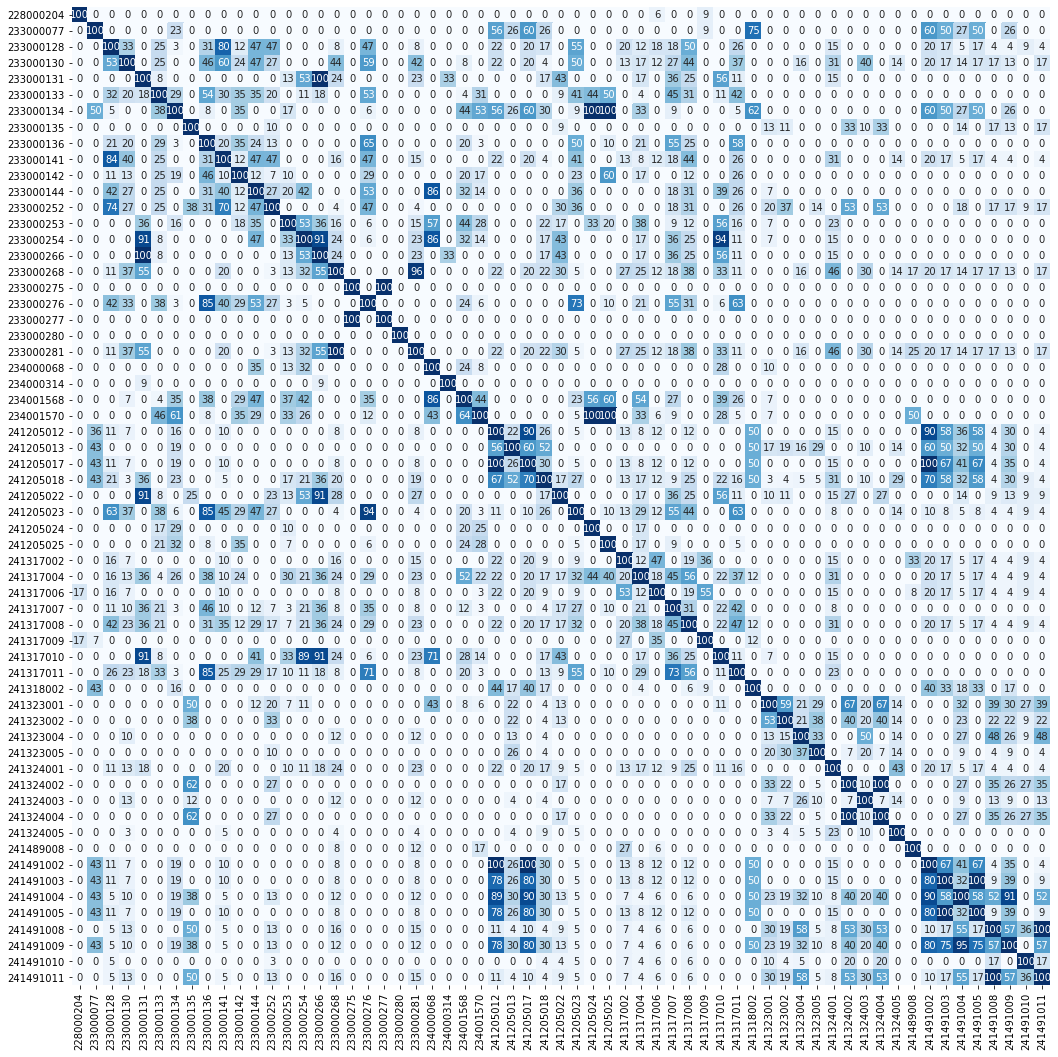

In [ ]:
# 히트맵으로 중복값들을 시각화함 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 18))
sns.heatmap(df_redundancy, square=True, annot=True, fmt='.0f', cmap='Blues', cbar=False, vmin=0, vmax=100)
plt.show()

**조금 더 자세한 수치를 알기위해 중복값의 분포도를 보도록하겠습니다.**

In [ ]:
redundancy_flat

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.88235294117647,
 0.0,
 0.0,
 9.090909090909092,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 22.58064516129032,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 55.55555555555556,
 26.08695652173913,
 60.0,
 26.08695652173913,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.090909090909092,
 0.0,
 0.0,
 75.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 60.0,
 50.0,
 27.27272727272727,
 50.0,
 0.0,
 26.08695652173913,
 0.0,
 0.0,
 0.0,
 0.0,
 33.33333333333333,
 0.0,
 25.0,
 3.225806451612903,
 0.0,
 30.76923076923077,
 80.0,
 11.76470588235294,
 47.05882352941176,
 46.66666666

In [ ]:
redundancy_flat = df_redundancy.values.flatten()    # 뭔가 값들만 쭉 뽑은 형태로 나오게 됨.
redundancy_flat = [i for i in redundancy_flat if i != 100]

In [ ]:
pd.Series(redundancy_flat).describe()

count    3641.000000
mean        8.216047
std        16.088612
min         0.000000
25%         0.000000
50%         0.000000
75%        10.000000
max        96.153846
dtype: float64

**0의 값이 많지만, 최대 96% 중복되는 노선 쌍도 있는것을 확인했습니다.**

높은 중복도를 가지고 있는 노선의 개수를 알아보기위해 **90%** 이상의 중복도만 뽑도록 하겠습니다.

In [ ]:
topn_pair = {}
for route_id1, others in diff_routes.items(): 
    for route_id2, redundancy in others.items():     #diff_routes는 딕셔너리 안에 딕셔너리가 있는 형태라서 이렇게 가능.     
        if route_id1 == route_id2:
            continue
        if redundancy >= 0.9 and (topn_pair.get((route_id2, route_id1), None) == None):    # get이건 뭔지 모름 그냥 이렇구나 싶음.
            topn_pair[(route_id1, route_id2)] = redundancy          
                                                                #topn_pair은 diff_routes에서 뽑아냈으므로, "화성시 병점|동탄|반월|진안|화산|기배 버스들이 지나는 노선 중에서 " 90퍼이상 겹치는 그 노선의 쌍과 겹치는 비율임.
                                                               #그리고 redundacy는 그 diff_routes에서 1.0,0.0 등 이런 숫자들임.
                                #topn_pair는 ---> 이런식. (a노선,b노선) : 몇퍼. (90퍼이상만 있음.) dict형태.

In [ ]:
topn_pair  #24쌍임

{(233000131, 233000254): 0.9090909090909091,
 (233000131, 233000266): 1.0,
 (233000131, 241205022): 0.9090909090909091,
 (233000131, 241317010): 0.9090909090909091,
 (233000266, 233000254): 0.9090909090909091,
 (233000266, 241205022): 0.9090909090909091,
 (233000266, 241317010): 0.9090909090909091,
 (233000268, 233000281): 1.0,
 (233000275, 233000277): 1.0,
 (233000276, 241205023): 0.9411764705882353,
 (241205012, 241205017): 1.0,
 (241205012, 241491002): 1.0,
 (241205017, 241491002): 1.0,
 (241205017, 241491004): 0.9,
 (241205024, 233000134): 1.0,
 (241205024, 234001570): 1.0,
 (241205025, 233000134): 1.0,
 (241205025, 234001570): 1.0,
 (241317010, 233000254): 0.9444444444444444,
 (241324002, 241324004): 1.0,
 (241491002, 241491004): 0.9,
 (241491003, 241491005): 1.0,
 (241491004, 241491009): 0.9545454545454546,
 (241491008, 241491011): 1.0}

In [ ]:
diff_routes

{228000204: {228000204: 1.0,
  233000077: 0.0,
  233000128: 0.0,
  233000130: 0.0,
  233000131: 0.0,
  233000133: 0.0,
  233000134: 0.0,
  233000135: 0.0,
  233000136: 0.0,
  233000141: 0.0,
  233000142: 0.0,
  233000144: 0.0,
  233000252: 0.0,
  233000253: 0.0,
  233000254: 0.0,
  233000266: 0.0,
  233000268: 0.0,
  233000275: 0.0,
  233000276: 0.0,
  233000277: 0.0,
  233000280: 0.0,
  233000281: 0.0,
  234000068: 0.0,
  234000314: 0.0,
  234001568: 0.0,
  234001570: 0.0,
  241205012: 0.0,
  241205013: 0.0,
  241205017: 0.0,
  241205018: 0.0,
  241205022: 0.0,
  241205023: 0.0,
  241205024: 0.0,
  241205025: 0.0,
  241317002: 0.0,
  241317004: 0.0,
  241317006: 0.16666666666666666,
  241317007: 0.0,
  241317008: 0.0,
  241317009: 0.16666666666666666,
  241317010: 0.0,
  241317011: 0.0,
  241318002: 0.0,
  241323001: 0.0,
  241323002: 0.0,
  241323004: 0.0,
  241323005: 0.0,
  241324001: 0.0,
  241324002: 0.0,
  241324003: 0.0,
  241324004: 0.0,
  241324005: 0.0,
  241489008: 0.0,
  2

In [ ]:
topn_pair
# 같은 노선은 없음. 90퍼이상 일치하는 것들. 

{(233000131, 233000254): 0.9090909090909091,
 (233000131, 233000266): 1.0,
 (233000131, 241205022): 0.9090909090909091,
 (233000131, 241317010): 0.9090909090909091,
 (233000266, 233000254): 0.9090909090909091,
 (233000266, 241205022): 0.9090909090909091,
 (233000266, 241317010): 0.9090909090909091,
 (233000268, 233000281): 1.0,
 (233000275, 233000277): 1.0,
 (233000276, 241205023): 0.9411764705882353,
 (241205012, 241205017): 1.0,
 (241205012, 241491002): 1.0,
 (241205017, 241491002): 1.0,
 (241205017, 241491004): 0.9,
 (241205024, 233000134): 1.0,
 (241205024, 234001570): 1.0,
 (241205025, 233000134): 1.0,
 (241205025, 234001570): 1.0,
 (241317010, 233000254): 0.9444444444444444,
 (241324002, 241324004): 1.0,
 (241491002, 241491004): 0.9,
 (241491003, 241491005): 1.0,
 (241491004, 241491009): 0.9545454545454546,
 (241491008, 241491011): 1.0}

In [ ]:
len(topn_pair)

24

총 24개의 노선쌍이 추출됐습니다.

이제 이 노선쌍들을 시각화 하여 살펴보겠습니다.

In [ ]:
df_topn_pair = pd.Series(topn_pair).to_frame().reset_index()      # 원래 df_tpon_pair는 dict형태임. 이걸 dataframe으로 만드는방법알아두자.
df_topn_pair.columns = ['route_1', 'route_2', 'redundancy']
df_topn_pair.sort_values('redundancy', ascending=False, inplace=True)
df_topn_pair.head()

,route_1,route_2,redundancy
12,241205017,241491002,1.0
10,241205012,241205017,1.0
21,241491003,241491005,1.0
19,241324002,241324004,1.0
17,241205025,234001570,1.0


In [ ]:
df_topn_pair

,route_1,route_2,redundancy
12,241205017,241491002,1.000000
10,241205012,241205017,1.000000
21,241491003,241491005,1.000000
19,241324002,241324004,1.000000
17,241205025,234001570,1.000000
16,241205025,233000134,1.000000
15,241205024,234001570,1.000000
14,241205024,233000134,1.000000
1,233000131,233000266,1.000000
11,241205012,241491002,1.000000


**해당 노선쌍들에 이전에 생선한 동탄/병점주변의 버스 노선의 몇 퍼센트가 포함되어 있는지 알아보겠습니다.**

 - --> 무슨말인지 모르겠음 
 --> 혹시 지금까지는 병점|동탄|반월|진안|화산|기배 자료가져온거가지고 처음에 했는데 그 중에서 동탄/병점만 구한다는것? 확실x
 

In [ ]:
# distinct한 노선ID만을 구해 list로 변환

dist_list = list(df_station_smy['ROUTE_ID'].unique())    #df_station_smy?? 이건 위에서 만든건데, 결국 버스정류장정보랑 버스노선정보
                                       # smy자료는 두 자료 합치고 화성시것만 뽑아서만든것. 병점|동탄|반월|진안|화산|기배 버스들 + 노선 + 정류장 위치 등 정보 다 있는거.
len(dist_list)         # 이 dist_list는 df_station_smy자료에서 결국 노선 번호들만 중복 안되게 골라 뽑은거.

61

In [ ]:
df_station_smy # 동탄과 병점만 있는게 아니라 진안, 등등 다 있음. 아예 자료없는것들도 있긴 함.

,ROUTE_ID,ROUTE_NM,SEQ,STATION_ID,STATION_NM,MAP_LAT,MAP_LON,관할관청,위치
0,228000204,24,53,233000169,한원IC,37.152733,127.122883,경기도 화성시,경기도 화성시 동탄면
1,228000204,24,54,233000168,장지동,37.155117,127.117900,경기도 화성시,경기도 화성시 동탄면
2,241317006,19-2,1,233000168,장지동,37.155117,127.117900,경기도 화성시,경기도 화성시 동탄면
3,241317009,39,1,233000168,장지동,37.155117,127.117900,경기도 화성시,경기도 화성시 동탄면
4,228000204,24,55,233000167,장지동,37.155867,127.115017,경기도 화성시,경기도 화성시 동탄면
...,...,...,...,...,...,...,...,...,...
1074,241491008,38,33,233000099,우남퍼스트빌3차아파트,37.198017,127.041283,경기도 화성시,경기도 화성시 병점동
1075,241491009,35,21,233000099,우남퍼스트빌3차아파트,37.198017,127.041283,경기도 화성시,경기도 화성시 병점동
1076,241491011,38-1,35,233000099,우남퍼스트빌3차아파트,37.198017,127.041283,경기도 화성시,경기도 화성시 병점동
1077,241491003,66A,20,233000949,우남퍼스트빌3차아파트,37.198433,127.041433,경기도 화성시,경기도 화성시 병점동


**각 노선쌍(route_1, route_2)에 포함된 노선ID들의 distinct 값을 구한 후 화성시 노선에 얼마나 포함이 되어있는지 알아보도록 하겠습니다.**

 - 이해안되는거 : 화성시(동탄 병점 반월 등등) 노선구했는데  동탄/병점 노선은 따로 구한다는것인지?

# 이해가 안 된다



- 동탄/병점만 따로 구한 적이 없음.


In [ ]:
# 코드는 이해 가는데 print 부분이 이해 안감. 그냥 대충넘어가야할듯.
cnt = 0

r_1_list = list(df_topn_pair['route_1'].unique())
r_all_list = r_1_list + list(df_topn_pair['route_2'].unique())

for e in dist_list:               #dist_list는 화성시병점|동탄|반월|진안|화산|기배 '버스노선번호들'만임. topn은 그 안에서 90퍼 이상들.
    if e in r_all_list: 
        # print(e)
        cnt = cnt+1
        
print('90% 이상 중복된 노선의 개수', len(topn_pair), '중 동탄/병점 주변 버스 노선의 중복된 개수는',cnt, '입니다.')
# --> 이거의 문제점 1. topn은 '쌍'이어서 한 노선이 여러 쌍 안에 중복되서 몇번이고 들어가는데 cnt는 중복 안 되게 노선들만 가져온것이라 서로 단위가 안맞아 비교불가.
# 문제점 2. 동탄/병점을 따로 구하려면 dist_list에서 반월진안화산기배를 빼야하는데 대체 왜 동탄/병점 버스라고 한 건지 이해x 


print('동탄/병점 주변 버스노선의 중복도 비율은 ', (len(topn_pair)/len(dist_list))*100,'% 입니다.')
# 24개 중 26개가 무슨 말인지 ...

90% 이상 중복된 노선의 개수 24 중 동탄/병점 주변 버스 노선의 중복된 개수는 26 입니다.
동탄/병점 주변 버스노선의 중복도 비율은  39.34426229508197 % 입니다.


### 분석결과 
동탄/병점 버스노선의 약 40%가 90%이상의 중복성을 가지고 있는걸로 확인 되었습니다. 
노선의 중복도는 시내버스 수요에 비해 노선이 과다 공급됨으로써, 상대적으로 노선이 필요한 지역에 노선을 공급하지 못하는 비효율을 초래하게 됩니다. 중복된 노선을 다시 검토하여 중복된 노선을 줄이는 과정이 필요한것 같습니다.

-----

## 2) 동탄역 vs 병점역 노선의 차이로 보는 <font color='red'>지선버스</font>의 필요성

**`folium library`를 사용하여 동탄역과 병점역 주변의 노선을 시각화하고 차이점을 알아보도록 하겠습니다.**

In [ ]:
import folium 
import folium.plugins
print(folium.__version__)

ModuleNotFoundError: No module named 'folium'

In [ ]:
# 여러 색상을 주기위한 color list
colors_list = ['#ff7473', '#ffc952', '#47b8e0', '#34314c', '#e1eef6', '#a5d296', '#8283a7', '#f6ea8c', '#f1bbba', '#a79c8e',
          '#a8dba8', '#ff7473', '#ffc952', '#47b8e0', '#34314c', '#e1eef6', '#a5d296', '#8283a7', '#f6ea8c', '#f1bbba', '#a79c8e',
          '#a8dba8', '#ff7473', '#ffc952', '#47b8e0', '#34314c', '#e1eef6', '#a5d296', '#8283a7', '#f6ea8c', '#f1bbba', '#a79c8e',
          '#a8dba8', '#ff7473', '#ffc952', '#47b8e0', '#34314c', '#e1eef6']

In [ ]:
# 노선ID별 버스번호를 list로 저장
bus_num_list = list(df_station_smy.sort_values(by=["ROUTE_ID", "SEQ"])['ROUTE_NM'])
bus_num_list = list(set(bus_num_list))


# folium map에 사용될 dictionary 생성
bus_dict = {}
for bus_nm in bus_num_list:
    bus_indexs = []
    for i in range(len(df_station_smy.sort_values(by=["ROUTE_ID", "SEQ"])['ROUTE_NM'])):
        if df_station_smy.sort_values(by=["ROUTE_ID", "SEQ"])['ROUTE_NM'].iloc[i] == bus_nm:
            bus_indexs.append(i)
    bus_dict.update({bus_nm:bus_indexs})

In [ ]:
# 동탄역 주변 좌표 [37.1995890, 127.0963040]
m = folium.Map(location=[37.1995890, 127.0963040], zoom_start=13)

cnt = 0
location_list = []
seq_list = []
bus_list = []

for bus_nm in bus_num_list:
    temp_df = df_station_smy.sort_values(by=["ROUTE_ID", "SEQ"]).loc[bus_dict[bus_nm]]
    temp_df.dropna(inplace=True)

    locations = []
    for i in range(0, len(temp_df['MAP_LAT'])):
        locations.append([temp_df['MAP_LAT'].iloc[i], temp_df['MAP_LON'].iloc[i]])
        folium.CircleMarker([temp_df['MAP_LAT'].iloc[i], temp_df['MAP_LON'].iloc[i]], 
                popup=(('RouteID: ' + str(temp_df['ROUTE_ID'].iloc[i]) +'\nBus#: ' + bus_nm + '의 ' + str(temp_df['SEQ'].iloc[i]) + '번째 정류장')), 
                        radius=2, color='yellow', fill_color='yellow').add_to(m)
    cnt = cnt + 1

    # 추후 dataframe 생성을 위해 위치/버스번호/경유순서 저장
    location_list.append(temp_df['위치'].iloc[i])
    bus_list.append(bus_nm)
    seq_list.append(temp_df['SEQ'].iloc[i])

    folium.PolyLine(locations=locations, tooltop='PolyLine', color=colors_list[cnt%30]).add_to(m)
m    

**동탄역과 병점역 근처 정류소를 조금 더 자세히 보도록 하겠습니다**

In [ ]:
d_img = mpimg.imread('dongtan.png')
b_img = mpimg.imread('bungjum.png')

fig=plt.figure(figsize=(20,20))

fig.add_subplot(1, 2, 1)
plt.imshow(d_img)

fig.add_subplot(1, 2, 2)
plt.imshow(b_img)

plt.show()

### 분석결과
위에 맵에서 볼 수있듯이 병점역에는 근접한 정류장이 많이 있으며 노선도 다양하게 있는 것을 알수있습니다. 그에 비해, 동탄역 인근 정류소는 적으며 있더라도 인근 거주지 근처에서 오는 노선이 아니라 조금 떨어진 정류소나 동탄역을 거치지 않고 병점역쪽으로 나가는 노선을 많이 볼 수가 있습니다. 사전조사 시 제일 많이 보았던 민원은 동탄동 주변 거주자들이 동탄역으로 조금 더 빠르고 편하게 역으로 갈 수 있기를 바라는거였습니다. 데이터에서도 볼 수 있듯이 아직 동탄역 인근 정류장은 많이 부족하며, 버스노선도 길고 멀리 가는 노선으로, 실제 사람들이 많이 거주하는 단지내에서 동탄역으로 바로 갈 수 있는 마을버스나 지선버스의 추가 배차가 필요한 것으로 보입니다.

---

## 3) 동탄역 vs 병점역 주변 정류장 <font color='red'>경유순서</font> 차이 분석

**동탄역과 병점역 주변 정류장의 경유순서가 어떤식으로 차이가 있는지 알아보도록 하겠습니다.**

In [ ]:
# 정류장 정보의 위치/버스번호/경유순서 정보에 대한 dataframe 생성
compare_df = pd.DataFrame(list(zip(location_list, bus_list, seq_list)), columns =['위치', 'BUS', 'SEQ']) 
compare_df

**생성된 dataframe에는 4개의 distinct 위치가 존재합니다.**
- 경기도 화성시 동탄면
- 경기도 화성시 병점동
- 경기도 화성시 진안동
- 경기도 화성시 반월동

그 중 동탄면과 병점동의 위치만 추출하여 분포도를 비교해보도록 하겠습니다.

In [ ]:
dongtan = compare_df[compare_df['위치'] == '경기도 화성시 동탄면']
bungjum = compare_df[compare_df['위치'] == '경기도 화성시 병점동']

print('병점동 분포도: ')
print(bungjum.describe(), '\n')

print('동탄면 분포도: ')
print(dongtan.describe())

**위에 결과를 boxplot으로 시각화해보도록 하겠습니다.**

In [ ]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.boxplot(y='SEQ', x='위치', 
            data=compare_df[(compare_df['위치'] == '경기도 화성시 동탄면') | (compare_df['위치'] == '경기도 화성시 병점동')], 
            palette="colorblind",
            hue='위치')

### 분석결과
Boxplot에서도 한 눈에 볼 수 있듯이 두 지역의 경유순서에는 차이가 있습니다. 동탄면에있는 정류장에는 대부분 정류장의순서(경유순서)가 끝쪽에 있는 반면 병점동 정류소들은 대게 앞쪽에 있는 것을 알 수 있습니다. 동탄면 정류장은 140번째가 넘는 경유순서도 있지만, 병점동 정류장은 최대 40번째의 경유순서를 갖습니다. 이를 통해 우리는 동탄역에서 출발하는 버스보다 도착하는 노선이 많다는 것을 알 수 있으며, 노선의 길이가 긴 버스들이 많이 있다는 것도 유추 할 수 있습니다. 비교적 짧은 노선을 갖는 병점동의 버스는 노선 복잡도면에서도 동탄역의 노선보다 효율적인 것을 알 수 있습니다. 시간이 오래걸리는 긴 노선에 대한 민원과 유사한 결과를 볼 수 있었으며, 기존 긴 노선들에 대해서는 검토하고 추후 새로운 버스 노선 생성시에는 동탄역 주변 출발에 대한 사항과 노선 길이를 고려하면 좋을 것 같습니다.